# Worksheet 3a: Linear Regression

The aim of this workshop is to get you coding linear regression models in python. For regression, we will do it in two ways, once using iterative updates (coordinate descent) and then using linear algebra. Finally we will evaluate the quality of the fit.

Firstly we will import the relevant libraries (*numpy, matplotlib*, etc), ensuring our plots appear *inline* rather than in separate windows.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import sys 

Populating the interactive namespace from numpy and matplotlib


To check what a command does simply type:

In [2]:
np.random.randn?

## Linear Regression

For this part we are going to load in some real data, we will use the example from the Olympics: the pace of Marathon winners. Load the data as follows:

In [3]:
csv = """1896,4.47083333333333
1900,4.46472925981123
1904,5.22208333333333
1908,4.1546786744085
1912,3.90331674958541
1920,3.5695126705653
1924,3.8245447722874
1928,3.62483706600308
1932,3.59284275388079
1936,3.53880791562981
1948,3.6701030927835
1952,3.39029110874116
1956,3.43642611683849
1960,3.2058300746534
1964,3.13275664573212
1968,3.32819844373346
1972,3.13583757949204
1976,3.07895880238575
1980,3.10581822490816
1984,3.06552909112454
1988,3.09357348817
1992,3.16111703598373
1996,3.14255243512264
2000,3.08527866650867
2004,3.1026582928467
2008,2.99877552632618
2012,3.03392977050993"""


if sys.version_info[0] >= 3:
    import io # Python3
    olympics = np.genfromtxt(io.BytesIO(csv.encode()), delimiter=",")
else:
    from StringIO import StringIO  # Python2
    olympics = np.genfromtxt(StringIO(csv), delimiter=',') #Python 2
    
print(olympics)    

[[ 1896.             4.47083333]
 [ 1900.             4.46472926]
 [ 1904.             5.22208333]
 [ 1908.             4.15467867]
 [ 1912.             3.90331675]
 [ 1920.             3.56951267]
 [ 1924.             3.82454477]
 [ 1928.             3.62483707]
 [ 1932.             3.59284275]
 [ 1936.             3.53880792]
 [ 1948.             3.67010309]
 [ 1952.             3.39029111]
 [ 1956.             3.43642612]
 [ 1960.             3.20583007]
 [ 1964.             3.13275665]
 [ 1968.             3.32819844]
 [ 1972.             3.13583758]
 [ 1976.             3.0789588 ]
 [ 1980.             3.10581822]
 [ 1984.             3.06552909]
 [ 1988.             3.09357349]
 [ 1992.             3.16111704]
 [ 1996.             3.14255244]
 [ 2000.             3.08527867]
 [ 2004.             3.10265829]
 [ 2008.             2.99877553]
 [ 2012.             3.03392977]]


This loads the data into a numpy array. You can extract the years and pace of the winners, respectively into column vectors as follows:

In [4]:
x = olympics[:, 0:1]
y = olympics[:, 1:2]

### Plotting the Data

And you can make a plot of $y$ vs $x$ with the following command:

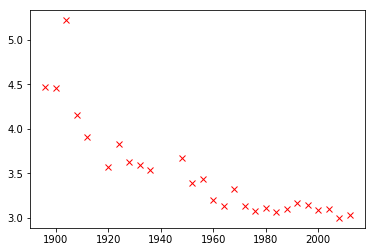

In [5]:
plt.plot(x, y, 'rx')

### Minimising Sum of Squared Residuals: Iterative Solution

Now we are going to fit a line, $y_i=a + bx_i$, to the data you've plotted. We are trying to minimize the sum of squared residuals:

$$SSR(a, b) = \sum_{i=1}^N(y_i-a-bx_i)^2$$

with respect to $a$ and $b$. We can start with an initial guess for $b$, 

In [6]:
b = -0.4

Then we use the maximum likelihood update to find an estimate for the offset, $a$,

$$a = \frac{\sum_{i=1}^N(y_i-b x_i)}{N}$$

In [7]:
a = sum(y-b*x)/len(x) # over to you

And now we can make an updated estimate for parameter *b*, using this estimate of *a*,

$$b = \frac{\sum_{i=1}^N (y_i - a) \times x_i}{\sum_{i=1}^N x_i^2}$$

In [8]:
b = sum((y-a)*x)/sum(np.square(x)) # over to you 

We can have a look at how good our fit is by computing the prediction across the input space. First create a vector of 'test points',

In [9]:
x_test = np.linspace(0, 1, 130)[:, None]

Now use this vector to compute some test predictions,

In [10]:
f_test = b*x_test + a # over to you 


Now plot those test predictions with a blue line on the same plot as the data,

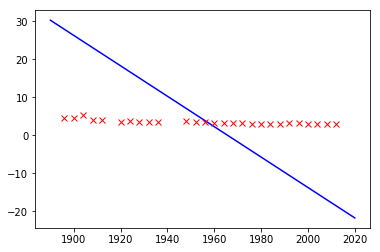

In [11]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Next compute the quality of the fit by evaluating the average sum of squares error of the prediction over the training samples, $SSR(a,b)$

In [12]:
SSR =  sum(np.square(y-a-b*x)) # over to you
print(SSR)

5104.5801631


The fit isn't very good, we need to iterate between these parameter updates in a loop to improve the fit, we have to do this several times,

In [13]:
for i in np.arange(10000):
    a = sum(y-b*x)/len(x)
    b = sum((y-a)*x)/sum(np.square(x))
    SSR = sum(np.square(y-a-b*x))
    if i % 500 == 0: 
        print('Iteration# ' ,i ,', training error SSR',SSR) 
(a, b)

Iteration#  0 , training error SSR 5101.21626302
Iteration#  500 , training error SSR 3668.91441726
Iteration#  1000 , training error SSR 2638.92547976
Iteration#  1500 , training error SSR 1898.24556335
Iteration#  2000 , training error SSR 1365.61194119
Iteration#  2500 , training error SSR 982.587413084
Iteration#  3000 , training error SSR 707.148944644
Iteration#  3500 , training error SSR 509.077165083
Iteration#  4000 , training error SSR 366.640888551
Iteration#  4500 , training error SSR 264.212905537
Iteration#  5000 , training error SSR 190.55546405
Iteration#  5500 , training error SSR 137.587334377
Iteration#  6000 , training error SSR 99.4971875519
Iteration#  6500 , training error SSR 72.1060130069
Iteration#  7000 , training error SSR 52.4086239053
Iteration#  7500 , training error SSR 38.2439470026
Iteration#  8000 , training error SSR 28.0579233258
Iteration#  8500 , training error SSR 20.7330066294
Iteration#  9000 , training error SSR 15.4655532725
Iteration#  9500 

(56.894560377698411, -0.027288339208269268)

And let's try plotting the result again

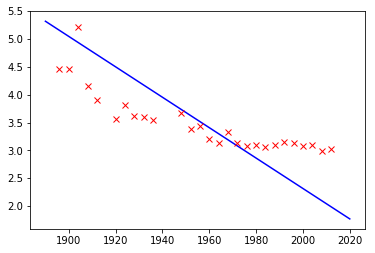

In [14]:
f_test = b*x_test + a # paste from above
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Does more than 10 iterations considerably improve fit in this case?

### Direct Solution with Linear Algebra

Hopefully, you are now persuaded of the merits of solving the entire system, simultaneously, using linear algebra. To do that, we need to make a *design matrix* of the data, which includes the $x_0=1$ column, to represent the bias. Remember that we are now moving to a system where our prediction is given by an inner product:

$$y_i \approx \mathbf{x}_i'\mathbf{w}$$

where each vector $\mathbf{x}_i$ is given by appending a 1 onto the original vector

$$\mathbf{x}'_i = 
\begin{bmatrix} 
1 &
x_i
\end{bmatrix}$$

We can do this for the entire data set to form a design matrix $\mathbf{X}$. Remember that the design matrix has data points in the *rows* and data features in the *columns*:

In [15]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[  1.00000000e+00   1.89600000e+03]
 [  1.00000000e+00   1.90000000e+03]
 [  1.00000000e+00   1.90400000e+03]
 [  1.00000000e+00   1.90800000e+03]
 [  1.00000000e+00   1.91200000e+03]
 [  1.00000000e+00   1.92000000e+03]
 [  1.00000000e+00   1.92400000e+03]
 [  1.00000000e+00   1.92800000e+03]
 [  1.00000000e+00   1.93200000e+03]
 [  1.00000000e+00   1.93600000e+03]
 [  1.00000000e+00   1.94800000e+03]
 [  1.00000000e+00   1.95200000e+03]
 [  1.00000000e+00   1.95600000e+03]
 [  1.00000000e+00   1.96000000e+03]
 [  1.00000000e+00   1.96400000e+03]
 [  1.00000000e+00   1.96800000e+03]
 [  1.00000000e+00   1.97200000e+03]
 [  1.00000000e+00   1.97600000e+03]
 [  1.00000000e+00   1.98000000e+03]
 [  1.00000000e+00   1.98400000e+03]
 [  1.00000000e+00   1.98800000e+03]
 [  1.00000000e+00   1.99200000e+03]
 [  1.00000000e+00   1.99600000e+03]
 [  1.00000000e+00   2.00000000e+03]
 [  1.00000000e+00   2.00400000e+03]
 [  1.00000000e+00   2.00800000e+03]
 [  1.00000000e+00   2.01200000e+03]]


From the multivariate regression solution, the maximum likelihood (equivalent to the mininum residual sum of squares, SSR) solution for $\mathbf{w}^*$ is given by

$$\mathbf{w}^* = \left[\mathbf{X}^\top \mathbf{X}\right]^{-1} \mathbf{X}^\top \mathbf{y}$$ 

### Solving the System

The solution for $\mathbf{w}$ is given in terms of a matrix inverse, but numerically this isn't the best way to compute it. What we actually want python to do is to *solve* the system of linear equations given by

$$\mathbf{X}^\top\mathbf{X} \mathbf{w} = \mathbf{X}^\top\mathbf{y}$$

for $\mathbf{w}$. This can be done in numpy using the command

In [ ]:
np.linalg.solve?

so we can obtain the solution using

In [16]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)) # back to you
print(w)

[[  2.88952457e+01]
 [ -1.29806477e-02]]


Allowing us to plot the fit as follows

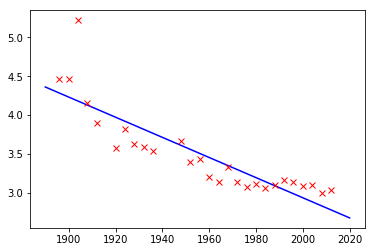

In [17]:
a, b = w
f_test = b*x_test + a
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

You should also verify that the sum of squared residuals of the learned weights, $SSR(w_0, w_1)$, match or beats your earlier iterative result

In [18]:
SSR = sum(np.square(y-a-b*x)) # back to you

The error we computed above is the training error. It doesn't assess the model's generalization ability, it only assesses how well it's performing on the given training data. In the next worksheet we will assess model's generalization ability using hold out validation.